In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [2]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [-2.0, -2.0]]
cluster_std = [2.0, 1.0]

X1, y1 = make_blobs(n_samples=[n_samples_1, n_samples_2], centers=centers, cluster_std=cluster_std, random_state=0, shuffle=False)


In [4]:
print(X1, y1) 

[[ 3.52810469  0.80031442]
 [ 1.95747597  4.4817864 ]
 [ 3.73511598 -1.95455576]
 ...
 [-2.62898071 -0.92992749]
 [-2.6210827  -0.26542783]
 [-3.09828943 -1.42738665]] [0 0 0 ... 1 1 1]


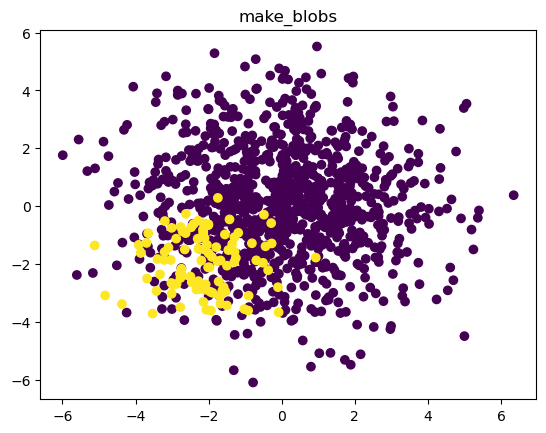

In [26]:
plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.title('make_blobs')
plt.show()


In [6]:
import numpy as np

np.random.seed(0)
n_points_per_cluster = 30000

C1 = [-6, -2] + 0.7 * np.random.randn(n_points_per_cluster, 2)
C2 = [-2, 2] + 0.3 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
C4 = [4, 4] + 0.1 * np.random.randn(n_points_per_cluster, 2)
C5 = [5, 0] + 1.4 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2.0 * np.random.randn(n_points_per_cluster, 2)

X2 = np.vstack((C1, C2, C3, C4, C5, C6))


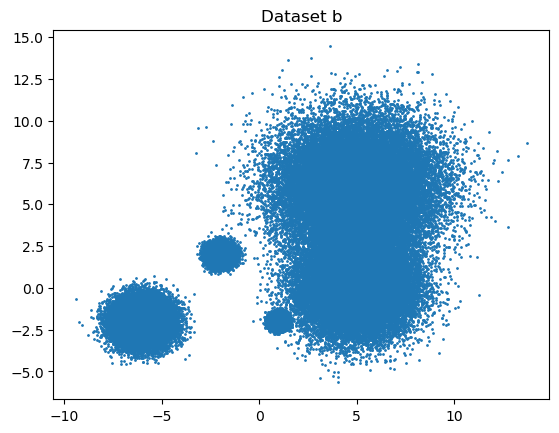

In [7]:
plt.scatter(X2[:, 0], X2[:, 1], s=1)
plt.title('Dataset b')
plt.show()


In [8]:
from sklearn.cluster import KMeans, MiniBatchKMeans


In [9]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X1)

minibatch_kmeans = MiniBatchKMeans(n_clusters=2, random_state=0)
minibatch_kmeans.fit(X1)


C:\Users\Tester\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tester\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=2, random_state=0)

In [10]:
from sklearn.cluster import KMeans, MiniBatchKMeans


kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(X1)


minibatch_kmeans = MiniBatchKMeans(n_clusters=2, random_state=0, n_init=3)
minibatch_kmeans.fit(X1)


MiniBatchKMeans(n_clusters=2, n_init=3, random_state=0)

In [11]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(X1)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [12]:
y_kmeans_a = kmeans.predict(X1)
y_minibatch_kmeans_a = minibatch_kmeans.predict(X1)


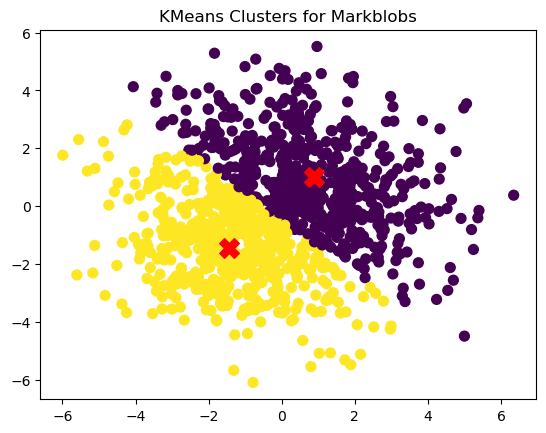

In [27]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans_a, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('KMeans Clusters for Markblobs')
plt.show()


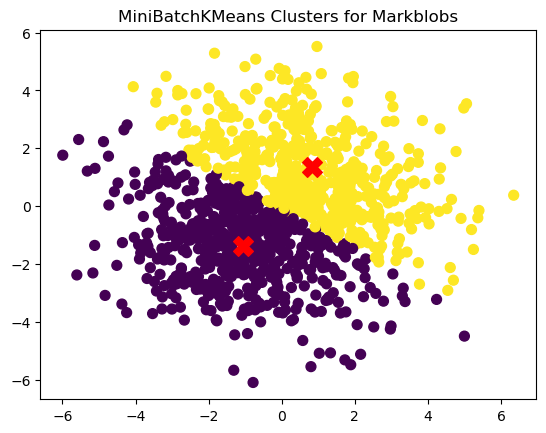

In [28]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_minibatch_kmeans_a, s=50, cmap='viridis')
plt.scatter(minibatch_kmeans.cluster_centers_[:, 0], minibatch_kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('MiniBatchKMeans Clusters for Markblobs')
plt.show()


In [15]:
from sklearn.metrics import adjusted_rand_score, calinski_harabasz_score, davies_bouldin_score


In [16]:
ari_kmeans_a = adjusted_rand_score(y1, y_kmeans_a)
ari_minibatch_kmeans_a = adjusted_rand_score(y1, y_minibatch_kmeans_a)

ch_kmeans_a = calinski_harabasz_score(X1, y_kmeans_a)
ch_minibatch_kmeans_a = calinski_harabasz_score(X1, y_minibatch_kmeans_a)

db_kmeans_a = davies_bouldin_score(X1, y_kmeans_a)
db_minibatch_kmeans_a = davies_bouldin_score(X1, y_minibatch_kmeans_a)


In [17]:
print(f"KMeans Adjusted Rand Index (Dataset a): {ari_kmeans_a}")
print(f"MiniBatchKMeans Adjusted Rand Index (Dataset a): {ari_minibatch_kmeans_a}")
print(f"KMeans Calinski-Harabasz Index (Dataset a): {ch_kmeans_a}")
print(f"MiniBatchKMeans Calinski-Harabasz Index (Dataset a): {ch_minibatch_kmeans_a}")
print(f"KMeans Davies-Bouldin Index (Dataset a): {db_kmeans_a}")
print(f"MiniBatchKMeans Davies-Bouldin Index (Dataset a): {db_minibatch_kmeans_a}")


KMeans Adjusted Rand Index (Dataset a): 0.04505812028448698
MiniBatchKMeans Adjusted Rand Index (Dataset a): 0.012162992826630218
KMeans Calinski-Harabasz Index (Dataset a): 633.0812630057959
MiniBatchKMeans Calinski-Harabasz Index (Dataset a): 621.2394181691559
KMeans Davies-Bouldin Index (Dataset a): 1.1381760122131444
MiniBatchKMeans Davies-Bouldin Index (Dataset a): 1.1551090815484246


In [18]:
kmeans_b = KMeans(n_clusters=6, random_state=0)
kmeans_b.fit(X2)
y_kmeans_b = kmeans_b.predict(X2)

minibatch_kmeans_b = MiniBatchKMeans(n_clusters=6, random_state=0)
minibatch_kmeans_b.fit(X2)
y_minibatch_kmeans_b = minibatch_kmeans_b.predict(X2)


C:\Users\Tester\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Tester\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
kmeans_b = KMeans(n_clusters=6, random_state=0, n_init=10)
kmeans_b.fit(X2)
y_kmeans_b = kmeans_b.predict(X2)

minibatch_kmeans_b = MiniBatchKMeans(n_clusters=6, random_state=0, n_init=3)
minibatch_kmeans_b.fit(X2)
y_minibatch_kmeans_b = minibatch_kmeans_b.predict(X2)

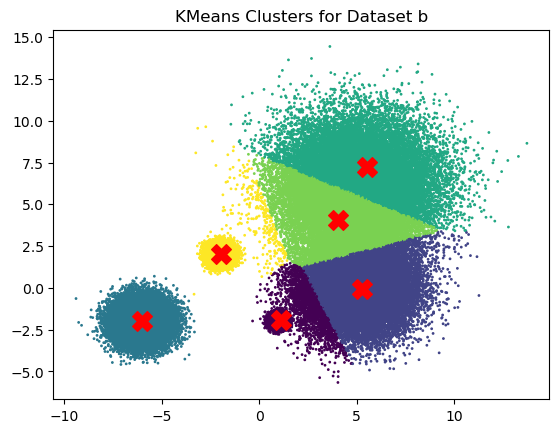

In [21]:
plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans_b, s=1, cmap='viridis')
plt.scatter(kmeans_b.cluster_centers_[:, 0], kmeans_b.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('KMeans Clusters for Dataset b')
plt.show()

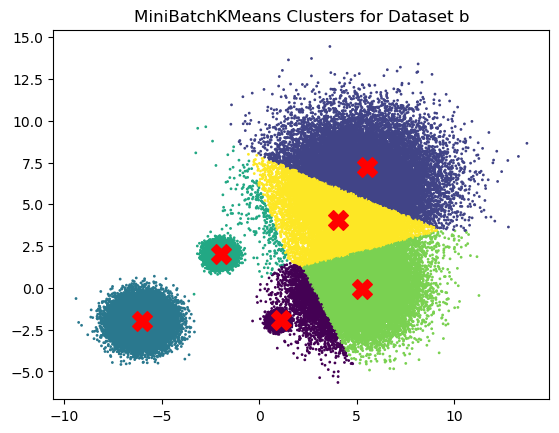

In [22]:
plt.scatter(X2[:, 0], X2[:, 1], c=y_minibatch_kmeans_b, s=1, cmap='viridis')
plt.scatter(minibatch_kmeans_b.cluster_centers_[:, 0], minibatch_kmeans_b.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('MiniBatchKMeans Clusters for Dataset b')
plt.show()


In [23]:
ari_kmeans_b = adjusted_rand_score(y_kmeans_b, y_kmeans_b)  s
ari_minibatch_kmeans_b = adjusted_rand_score(y_minibatch_kmeans_b, y_minibatch_kmeans_b)

ch_kmeans_b = calinski_harabasz_score(X2, y_kmeans_b)
ch_minibatch_kmeans_b = calinski_harabasz_score(X2, y_minibatch_kmeans_b)

db_kmeans_b = davies_bouldin_score(X2, y_kmeans_b)
db_minibatch_kmeans_b = davies_bouldin_score(X2, y_minibatch_kmeans_b)

print(f"KMeans Adjusted Rand Index (Dataset b): {ari_kmeans_b}")
print(f"MiniBatchKMeans Adjusted Rand Index (Dataset b): {ari_minibatch_kmeans_b}")
print(f"KMeans Calinski-Harabasz Index (Dataset b): {ch_kmeans_b}")
print(f"MiniBatchKMeans Calinski-Harabasz Index (Dataset b): {ch_minibatch_kmeans_b}")
print(f"KMeans Davies-Bouldin Index (Dataset b): {db_kmeans_b}")
print(f"MiniBatchKMeans Davies-Bouldin Index (Dataset b): {db_minibatch_kmeans_b}")

KMeans Adjusted Rand Index (Dataset b): 1.0
MiniBatchKMeans Adjusted Rand Index (Dataset b): 1.0
KMeans Calinski-Harabasz Index (Dataset b): 575061.5806580335
MiniBatchKMeans Calinski-Harabasz Index (Dataset b): 575048.5381234039
KMeans Davies-Bouldin Index (Dataset b): 0.5056380725254451
MiniBatchKMeans Davies-Bouldin Index (Dataset b): 0.5056516255788712
